# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [24]:
# Write your answer here
print("Xinyuan Nate Hu")

Xinyuan Nate Hu


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [25]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [26]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

In this quiz you will work with exchange rate data on bitcoin, <br>
for two exchange platforms:

- 1 coin base bit coin (CB) to dollar (USD)
- 1 ethereum bit coin (ET) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "bitcoin.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [27]:
# Write your own code
df = pd.read_csv("data_raw/bitcoin.csv")
df["date"] = pd.to_datetime(df["date_string"])
df["date_test"] = df["date"].dt.strftime("%Y %b %d, %A")
df  = df.sort_values("date",ascending = True)

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "cb_to_usd" and "et_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 CoinBase bitcoin to USD" <br>
and "1 Ethereum bitcoin to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```

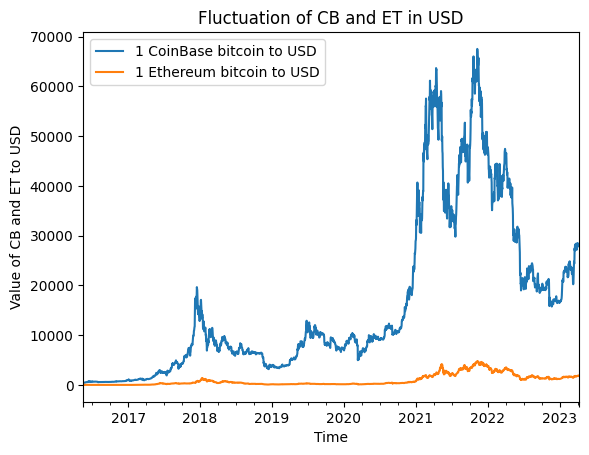

In [28]:
# Write your own code
df[["date","cb_to_usd","et_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of CB and ET to USD")
plt.title("Fluctuation of CB and ET in USD")
plt.legend(["1 CoinBase bitcoin to USD","1 Ethereum bitcoin to USD"])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_cb" which computes the percentage daily <br>
growth rate of "cb_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [29]:
# Write your own code
df["diff_cb"] = df["cb_to_usd"].diff()
df["lag_cb"]    = df["cb_to_usd"].shift(1)
df["growth_cb"] = df["diff_cb"]* 100/df["lag_cb"]


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_cb" had a value greater than 15 or less than -15
- Generate a line plot with the "growth_cb" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



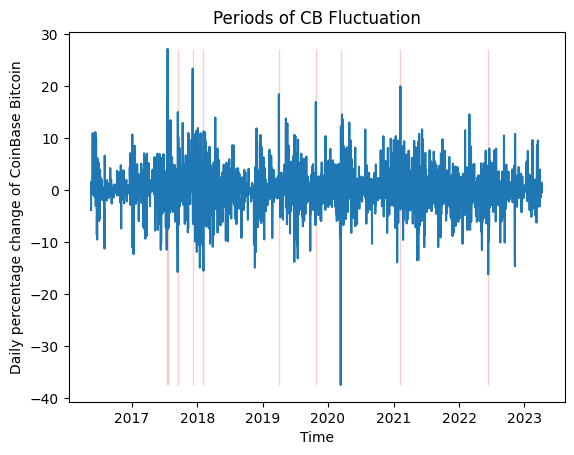

In [30]:
# Write your own code
df["bool_cond"] = (abs(df["growth_cb"]) > 15) 

plt.plot("date", "growth_cb", data = df)
plt.xlabel("Time")
plt.ylabel("Daily percentage change of CoinBase Bitcoin")
plt.title("Periods of CB Fluctuation")

vec_y = df["growth_cb"]
plt.fill_between(x= df["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = df["bool_cond"],
                 alpha = 0.2,color = "red")

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "cb_to_usd"
- Display the dataset




In [31]:
# Write your own code
month_config = pd.Grouper(key='date', freq='m')

agg_data = (df 
               .groupby(month_config)
               .agg(cb_to_usd_std = ("cb_to_usd","std"))
               .reset_index())

display(agg_data)

,date,cb_to_usd_std
0,2016-05-31,37.522931
1,2016-06-30,67.727627
2,2016-07-31,13.843294
3,2016-08-31,11.616248
4,2016-09-30,10.997678
...,...,...
79,2022-12-31,317.869463
80,2023-01-31,2655.277513
81,2023-02-28,947.762915
82,2023-03-31,2826.126499


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["cb_to_usd","et_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [32]:
# Write your own code
df_long = pd.melt(df,
                         var_name   = "type",
                         value_name = "exchange_rate",
                         id_vars='date',
                         value_vars=['cb_to_usd','et_to_usd'])

display(df_long)

,date,type,exchange_rate
0,2016-05-18,cb_to_usd,455.56
1,2016-05-19,cb_to_usd,438.38
2,2016-05-20,cb_to_usd,445.65
3,2016-05-21,cb_to_usd,446.28
4,2016-05-22,cb_to_usd,442.48
...,...,...,...
5031,2023-04-05,et_to_usd,1910.39
5032,2023-04-06,et_to_usd,1873.51
5033,2023-04-07,et_to_usd,1864.71
5034,2023-04-08,et_to_usd,1850.01
